In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, cholesky

In [20]:
epsilon = 0.1
dt = 0.01
t_past = 40
t_future = 40 

In [21]:
t_max = t_past + t_future
t = np.arange(0, t_max, dt)
n_t_max = len(t)

In [22]:
n_t_past = int(t_past / dt)
n_t_future = int(t_future / dt)

In [29]:
M = np.zeros(n_t_max) 
for i in range(n_t_max):
    tau = t[i] - t[0]
    M[i] = (epsilon**2 - tau**2) / (epsilon**2 + tau**2)**2

In [30]:
T = toeplitz(M)
L = cholesky(T, lower=True)

In [31]:
C = L[n_t_future:, n_t_future]

In [32]:
# test
M_test = np.zeros(n_t_past)
for i in range(n_t_past):
    M_test[i] = np.dot(C[:len(C)-i], C[i:])

(0.0, 100.0)

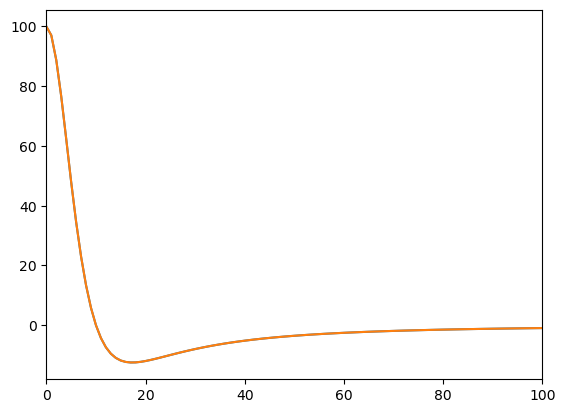

In [35]:
#plt.yscale('log')
plt.plot(M)
plt.plot(M_test)
plt.xlim([0, 100])

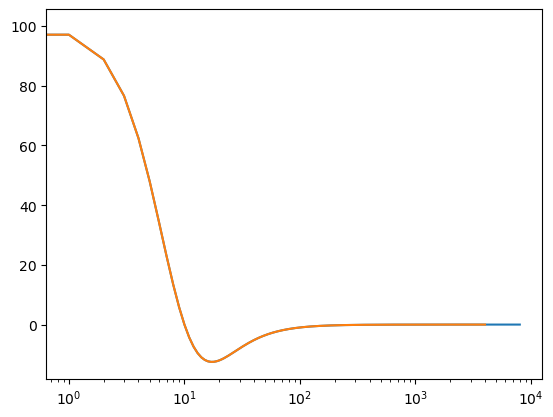

In [36]:
plt.xscale('log')
plt.plot(M)
plt.plot(M_test)